In [291]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(42)
sns.set_theme(style="darkgrid")

In [307]:
df = pd.read_csv("./data/greedyVsStingy.csv")
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,STINGY,1487,2,0,1,3
1,STINGY,1373,5,1,1,7
2,GREEDY,1162,12,1,1,14
3,GREEDY,6097,16,1,3,20
4,GREEDY,1140,13,1,1,15


In [308]:
df.groupby("strategy").mean()


,money,countries,utilities,stations,totalLandsOwned
strategy,,,,,
GREEDY,4235.538856,15.607173,1.484202,3.038429,20.129804
STINGY,1601.612469,3.063570,0.314181,0.717604,4.095355


Who wins more on average?

In [294]:
df = pd.read_csv("./data/defaultVsStingy.csv")
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,DEFAULT,7845,15,2,3,20
1,DEFAULT,7362,15,1,4,20
2,DEFAULT,30094,14,2,1,17
3,DEFAULT,7118,14,2,4,20
4,DEFAULT,7145,16,2,3,21


(0.4033233333333333, 0.4466666666666667)

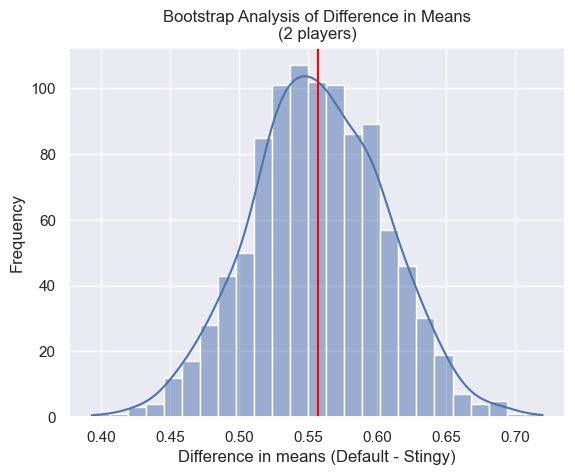

In [295]:
diff = []
stingy_ps = []
default_ps = []
for _ in range(1000):
    bootsample = df.sample(300, replace=True)
    default_p = bootsample['strategy'].value_counts()['DEFAULT']/bootsample.shape[0]
    stingy_p = bootsample['strategy'].value_counts()['STINGY']/bootsample.shape[0]
    stingy_ps.append(stingy_p)
    default_ps.append(default_p)
    diff.append(default_p - stingy_p)
sns.histplot(diff, kde=True)
plt.xlabel("Difference in means (Default - Stingy)")
plt.ylabel("Frequency")
plt.title("Bootstrap Analysis of Difference in Means\n(2 players)")
plt.axvline(np.mean(diff), color='red')
np.percentile(diff, 0.05), np.percentile(diff, 0.95)

### Greedy Vs Stingy

In [296]:
df = pd.read_csv("./data/greedyVsStingy.csv")
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,STINGY,1487,2,0,1,3
1,STINGY,1373,5,1,1,7
2,GREEDY,1162,12,1,1,14
3,GREEDY,6097,16,1,3,20
4,GREEDY,1140,13,1,1,15


(-6.666666666666973e-06, 0.043269999999999996)

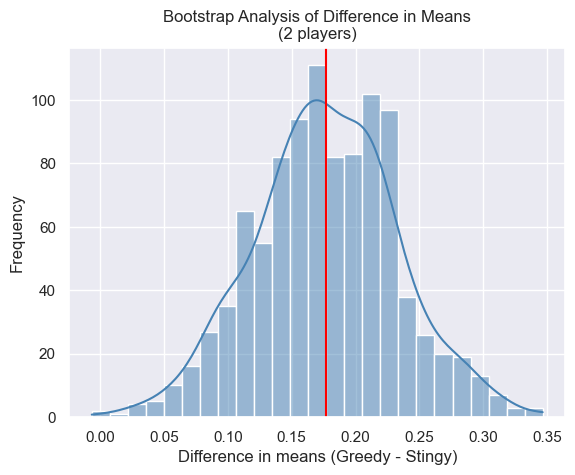

In [297]:
diff = []
greedy_ps = []
stingy_ps = []
for _ in range(1000):
    bootsample = df.sample(300, replace=True)
    greedy_p = bootsample['strategy'].value_counts()['GREEDY']/bootsample.shape[0]
    stingy_p = bootsample['strategy'].value_counts()['STINGY']/bootsample.shape[0]
    greedy_ps.append(greedy_p)
    stingy_ps.append(stingy_p)
    diff.append(greedy_p - stingy_p)
sns.histplot(diff, color='steelBlue', kde=True)
plt.xlabel("Difference in means (Greedy - Stingy)")
plt.ylabel("Frequency")
plt.title("Bootstrap Analysis of Difference in Means\n(2 players)")
plt.axvline(np.mean(diff), color='red')
np.percentile(diff, 0.05), np.percentile(diff, 0.95)

In [298]:
df = pd.read_csv('./data/stationGuyVsUtilityGuy.csv')
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,STATION_GUY,596,6,0,3,9
1,UTILITY_GUY,514,5,1,3,9
2,STATION_GUY,14766,13,0,2,15
3,STATION_GUY,11620,13,1,4,18
4,UTILITY_GUY,12665,9,1,1,11


(0.00999000000000001, 0.05660333333333333)

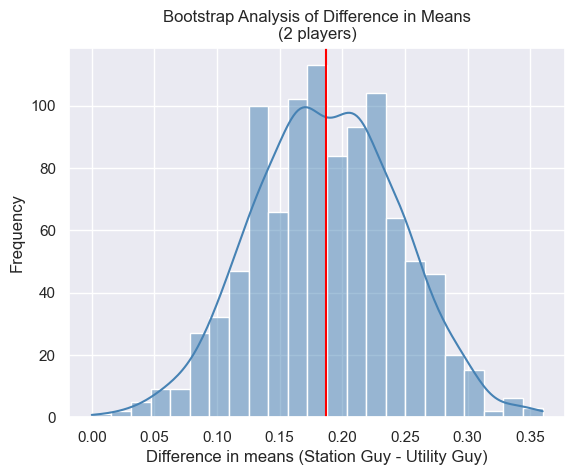

In [299]:
diff = []
station_ps = []
utility_ps = []
for _ in range(1000):
    bootsample = df.sample(300, replace=True)
    utility_p = bootsample['strategy'].value_counts()['UTILITY_GUY']/bootsample.shape[0]
    station_p = bootsample['strategy'].value_counts()['STATION_GUY']/bootsample.shape[0]
    station_ps.append(station_p)
    utility_ps.append(utility_p)
    diff.append(station_p - utility_p)
sns.histplot(diff, color='steelBlue', kde=True)
plt.xlabel("Difference in means (Station Guy - Utility Guy)")
plt.ylabel("Frequency")
plt.title("Bootstrap Analysis of Difference in Means\n(2 players)")
plt.axvline(np.mean(diff), color='red')
np.percentile(diff, 0.05), np.percentile(diff, 0.95)

In [300]:
df = pd.read_csv('./data/All5.csv')
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,GREEDY,23231,12,0,1,13
1,GREEDY,21827,9,2,1,12
2,GREEDY,17991,10,1,0,11
3,GREEDY,30925,9,0,0,9
4,STATION_GUY,72972,4,0,1,5


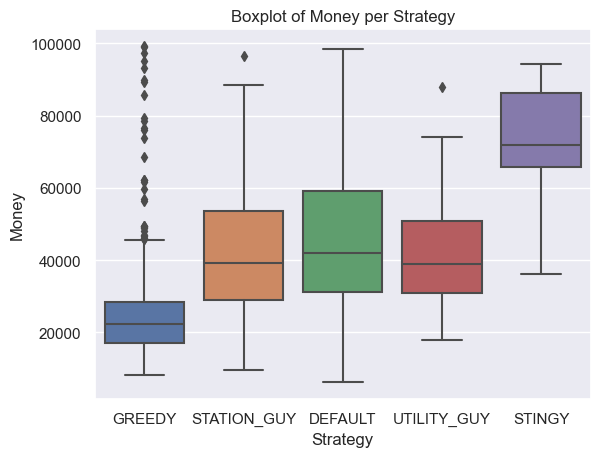

In [301]:
sns.boxplot(x='strategy', y='money', data=df)
plt.title('Boxplot of Money per Strategy')
plt.xlabel('Strategy')
plt.ylabel('Money')
plt.show();

In [302]:
df.groupby('strategy').count()

,money,countries,utilities,stations,totalLandsOwned
strategy,,,,,
DEFAULT,122,122,122,122,122
GREEDY,367,367,367,367,367
STATION_GUY,103,103,103,103,103
STINGY,13,13,13,13,13
UTILITY_GUY,73,73,73,73,73


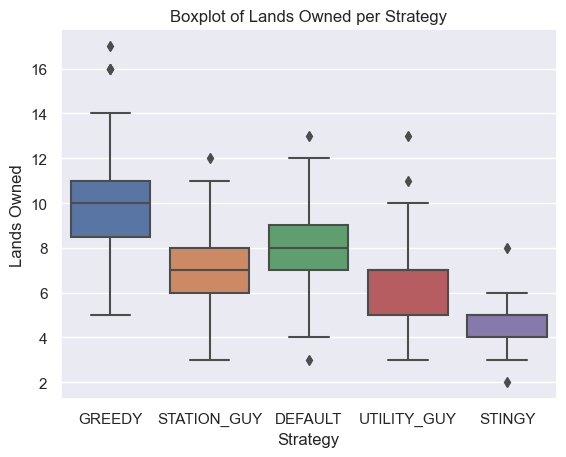

In [303]:
sns.boxplot(x='strategy', y='totalLandsOwned', data=df)
plt.title('Boxplot of Lands Owned per Strategy')
plt.xlabel('Strategy')
plt.ylabel('Lands Owned')
plt.show();

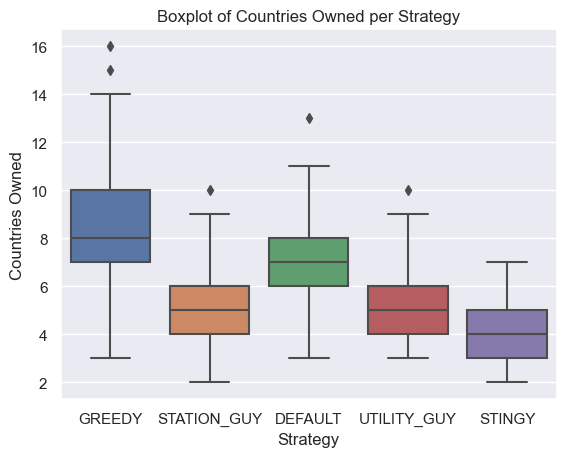

In [304]:
sns.boxplot(x='strategy', y='countries', data=df)
plt.title('Boxplot of Countries Owned per Strategy')
plt.xlabel('Strategy')
plt.ylabel('Countries Owned')
plt.show();